In [50]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

In [51]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-12 22:06:56,709 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-12 22:06:56,712 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-12 22:06:56,713 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 22:06:56,713 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-12 22:06:56,714 Parameters: cosmological_simulation   = 0.0


In [52]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [95]:
def cut_spec(ray_, lmin, lmax, num, dlam=0.001, line=None, el=None, rom_num=None, 
             lrest=None, gamma=None, f_value=None, DIY=False):
    
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    ray = ray_
    all_data = ray.all_data()
  
    cold_gas = ray.cut_region(all_data, 'obj["gas", "temperature"] < 50000')
    
    int_gas = ray.cut_region(all_data, 
                             ['obj["gas", "temperature"] > 50000' , 'obj["gas", "temperature"] < 500000'])
    
    hot_gas = ray.cut_region(all_data, 'obj["gas", "temperature"] > 500000')
                            
    
    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    
    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(all_data, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg.make_spectrum(cold_gas, lines=[DIY_line])
        sg.save_spectrum('spec_c.txt')
        
        sg.make_spectrum(int_gas, lines=[DIY_line])
        sg.save_spectrum('spec_i.txt')
        
        sg.make_spectrum(hot_gas, lines=[DIY_line])
        sg.save_spectrum('spec_h.txt')
        
    else:
        sg.make_spectrum(all_data, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg.make_spectrum(cold_gas, lines=[line])
        sg.save_spectrum('spec_c.txt')
        
        sg.make_spectrum(int_gas, lines=[line])
        sg.save_spectrum('spec_i.txt')
        
        sg.make_spectrum(hot_gas, lines=[line])
        sg.save_spectrum('spec_h.txt')
        
    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec_c.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]
    
    f3 = np.loadtxt('spec_i.txt')
    lam3 = f3[:,0] # All rows, 1st column
    flux3 = f3[:,2]
    
    f4 = np.loadtxt('spec_h.txt')
    lam4 = f4[:,0] # All rows, 1st column
    flux4 = f4[:,2]

    tog = np.array([lam, flux, lam2, flux2, lam3, flux3, lam4, flux4])
    
    fig = plt.figure(figsize=(15, 5))
    plt.plot(tog[4], tog[5], color='limegreen', label='Intermediate Gas', linewidth=5, alpha=0.6)
    plt.plot(tog[2], tog[3], color='dodgerblue', label='Cold Gas', alpha=0.7,linewidth=3)
    plt.plot(tog[6], tog[7], color='crimson', label='Hot Gas', alpha=0.6,linewidth=2.4)
    plt.plot(tog[0], tog[1], color='black', label='All Gas', alpha=0.7, ls='--')
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    plt.xlim(lmin, lmax)
    
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
   

In [54]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)

yt : [INFO     ] 2022-07-12 22:07:04,708 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-12 22:07:04,709 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-07-12 22:07:05,368 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-07-12 22:07:05,453 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-12 22:07:05,454 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-12 22:07:05,454 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-12 22:07:05,454 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

yt : [INFO     ] 2022-07-12 22:40:47,259 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:47,270 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9114.80it/s]
yt : [INFO     ] 2022-07-12 22:40:47,347 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:47,373 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 14/14 [00:00<00:00, 842.31it/s]
yt : [INFO     ] 2022-07-12 22:40:47,397 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:47,423 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 6/6 [00:00<00:00, 4378.95it/s]
yt : [INFO     ] 2022-07-12 22:40:47,427 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:47,452 Creating spectrum
yt : [INFO     ] 2022-07-12 22:40:47,453 Not adding line Si II 1526: insufficient column density
yt : [INFO     ] 2022-07-12 22:40:47,454 Writing spectrum to as

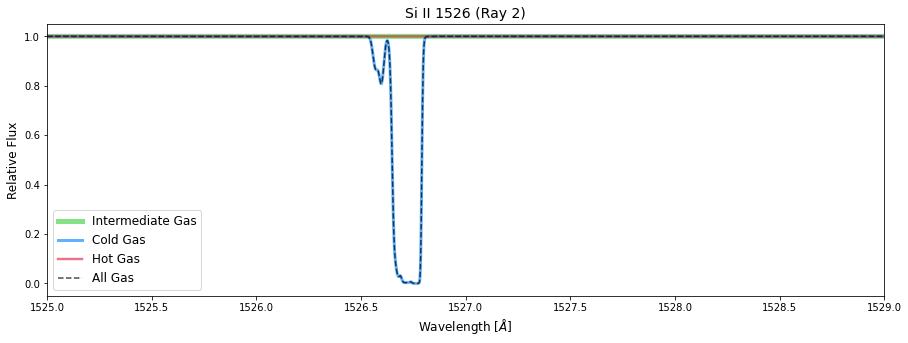

In [97]:
cut_spec(ray2, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, num='2')

yt : [INFO     ] 2022-07-12 22:40:30,301 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:30,314 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8928.58it/s]
yt : [INFO     ] 2022-07-12 22:40:30,422 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:30,448 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 14/14 [00:00<00:00, 806.44it/s]
yt : [INFO     ] 2022-07-12 22:40:30,492 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:30,518 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 6/6 [00:00<00:00, 1885.08it/s]
yt : [INFO     ] 2022-07-12 22:40:30,528 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:30,554 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 236/236 [00:00<00:00, 28703.12it/s]
yt : [INFO     ] 2022-07-12 22:40:30,575 Writing spectrum t

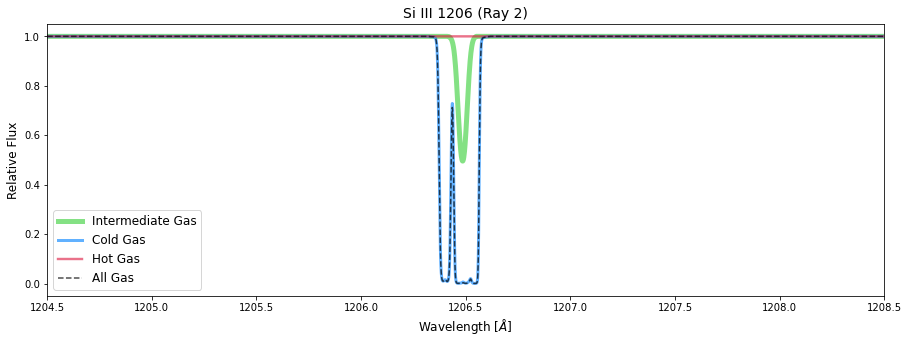

In [96]:
cut_spec(ray2, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, num='2')
plt.savefig('Overleaf Plots/Si3_Temp.jpg', dpi=800)

yt : [INFO     ] 2022-07-12 22:40:53,479 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:53,491 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9473.05it/s]
yt : [INFO     ] 2022-07-12 22:40:53,565 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:53,591 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 14/14 [00:00<00:00, 1251.90it/s]
yt : [INFO     ] 2022-07-12 22:40:53,610 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:53,636 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 6/6 [00:00<00:00, 1203.07it/s]
yt : [INFO     ] 2022-07-12 22:40:53,644 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:53,669 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 236/236 [00:00<00:00, 27338.04it/s]
yt : [INFO     ] 2022-07-12 22:40:53,680 Writing spectrum to a

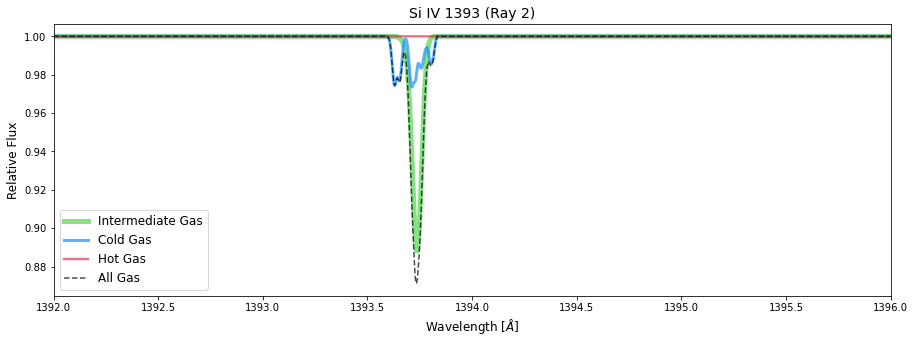

In [98]:
cut_spec(ray2, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, num='2')

yt : [INFO     ] 2022-07-12 22:40:53,905 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:53,908 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4519.63it/s]
yt : [INFO     ] 2022-07-12 22:40:53,994 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:54,019 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 42/42 [00:00<00:00, 906.87it/s]
yt : [INFO     ] 2022-07-12 22:40:54,073 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:54,099 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 3/3 [00:00<00:00, 4679.40it/s]
yt : [INFO     ] 2022-07-12 22:40:54,102 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:54,128 Creating spectrum
yt : [INFO     ] 2022-07-12 22:40:54,129 Not adding line Si II 1526: insufficient column density
yt : [INFO     ] 2022-07-12 22:40:54,129 Writing spectrum to as

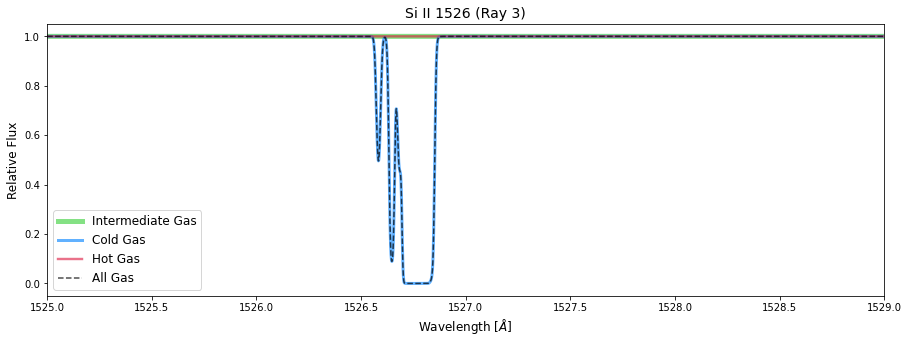

In [99]:
cut_spec(ray3, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, num='3')

yt : [INFO     ] 2022-07-12 22:40:54,360 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:54,427 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4781.28it/s]
yt : [INFO     ] 2022-07-12 22:40:54,559 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:54,585 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 42/42 [00:00<00:00, 933.31it/s]
yt : [INFO     ] 2022-07-12 22:40:54,678 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:54,705 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 3/3 [00:00<00:00, 1089.71it/s]
yt : [INFO     ] 2022-07-12 22:40:54,716 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:54,744 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 211/211 [00:00<00:00, 29139.58it/s]
yt : [INFO     ] 2022-07-12 22:40:54,762 Writing spectrum t

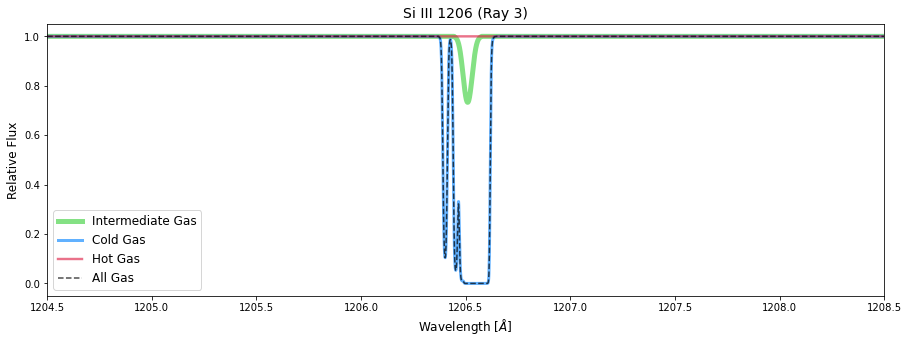

In [100]:
cut_spec(ray3, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, num='3')

yt : [INFO     ] 2022-07-12 22:40:54,984 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:54,987 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5595.87it/s]
yt : [INFO     ] 2022-07-12 22:40:55,064 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:55,090 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 42/42 [00:00<00:00, 1134.83it/s]
yt : [INFO     ] 2022-07-12 22:40:55,136 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:55,162 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 3/3 [00:00<00:00, 852.73it/s]
yt : [INFO     ] 2022-07-12 22:40:55,168 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:40:55,194 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 211/211 [00:00<00:00, 28299.11it/s]
yt : [INFO     ] 2022-07-12 22:40:55,205 Writing spectrum to as

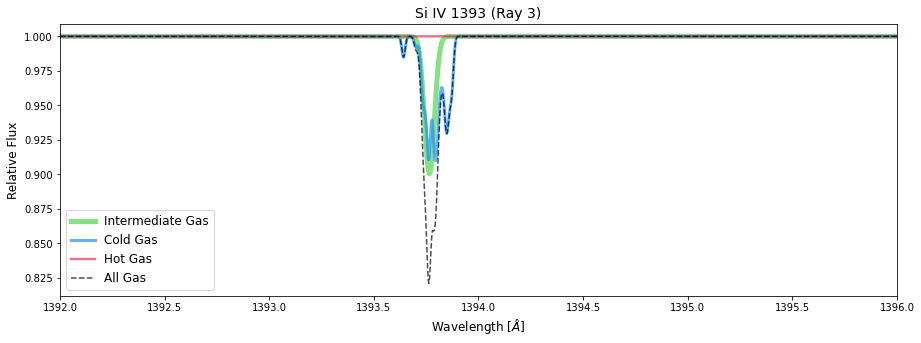

In [101]:
cut_spec(ray3, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, num='3')

yt : [INFO     ] 2022-07-12 22:40:55,432 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:55,434 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 566.16it/s] 
yt : [INFO     ] 2022-07-12 22:40:55,916 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:55,917 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:56,018 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 14/14 [00:00<00:00, 34.79it/s]
yt : [INFO     ] 2022-07-12 22:40:56,427 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:56,428 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:56,428 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:56,527 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 6/6 [00:00<00:00, 

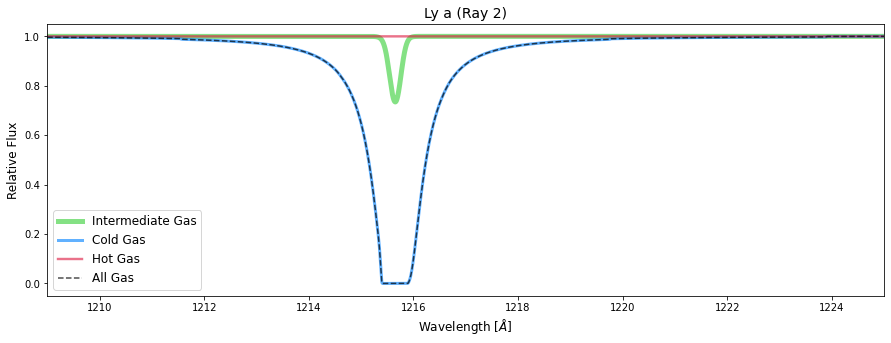

In [102]:
cut_spec(ray_=ray2, lmin=1209, lmax=1225, line='Ly a', num='2')

yt : [INFO     ] 2022-07-12 22:40:57,225 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:57,229 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 281.76it/s]
yt : [INFO     ] 2022-07-12 22:40:58,168 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:58,168 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:40:58,265 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 42/42 [00:00<00:00, 50.41it/s]
yt : [INFO     ] 2022-07-12 22:40:59,148 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:59,149 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-12 22:40:59,149 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:40:59,247 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 3/3 [00:00<00:00, 3

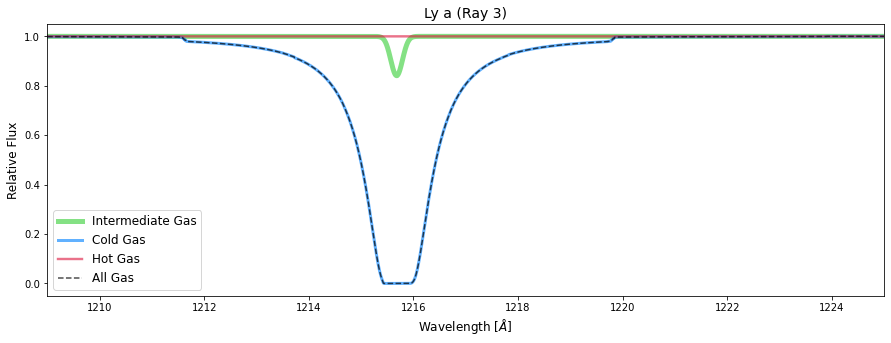

In [103]:
cut_spec(ray_=ray3, lmin=1209, lmax=1225, line='Ly a', num='3')

yt : [INFO     ] 2022-07-12 22:40:59,928 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:40:59,931 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8683.02it/s]
yt : [INFO     ] 2022-07-12 22:40:59,989 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:00,015 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 14/14 [00:00<00:00, 791.05it/s]
yt : [INFO     ] 2022-07-12 22:41:00,042 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:00,069 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 6/6 [00:00<00:00, 1675.04it/s]
yt : [INFO     ] 2022-07-12 22:41:00,075 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:00,100 Creating spectrum
yt : [INFO     ] 2022-07-12 22:41:00,101 Not adding line C II 1334: insufficient column density
yt : [INFO     ] 2022-07-12 22:41:00,102 Writing spectrum to ascii 

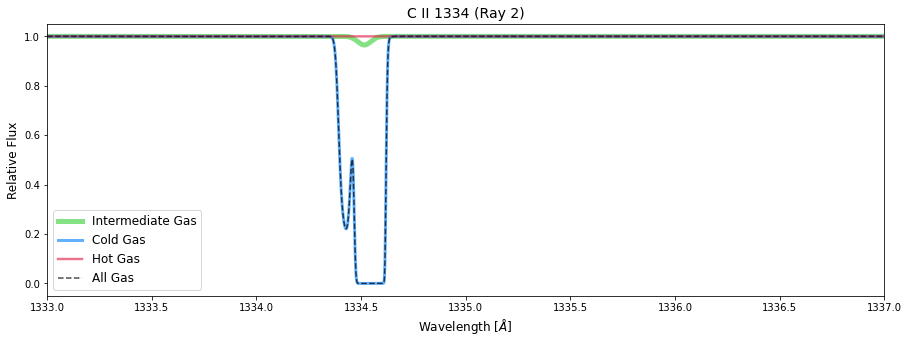

In [104]:
cut_spec(ray2, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, num='2')

yt : [INFO     ] 2022-07-12 22:41:00,327 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:00,330 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8675.30it/s]
yt : [INFO     ] 2022-07-12 22:41:00,421 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:00,447 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 14/14 [00:00<00:00, 886.48it/s]
yt : [INFO     ] 2022-07-12 22:41:00,490 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:00,516 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 6/6 [00:00<00:00, 1071.21it/s]
yt : [INFO     ] 2022-07-12 22:41:00,531 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:00,559 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 236/236 [00:00<00:00, 26351.18it/s]
yt : [INFO     ] 2022-07-12 22:41:00,581 Writing spectrum to ascii file

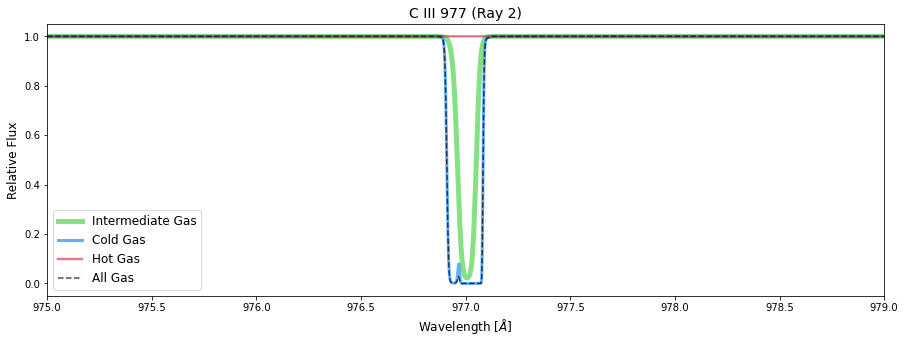

In [105]:
cut_spec(ray2, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, num='2')

yt : [INFO     ] 2022-07-12 22:41:00,807 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:00,810 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4454.05it/s]
yt : [INFO     ] 2022-07-12 22:41:00,956 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:00,982 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 42/42 [00:00<00:00, 889.10it/s]
yt : [INFO     ] 2022-07-12 22:41:01,084 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:01,111 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 3/3 [00:00<00:00, 832.59it/s]
yt : [INFO     ] 2022-07-12 22:41:01,123 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:01,150 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 211/211 [00:00<00:00, 27613.91it/s]
yt : [INFO     ] 2022-07-12 22:41:01,169 Writing spectrum to ascii file:

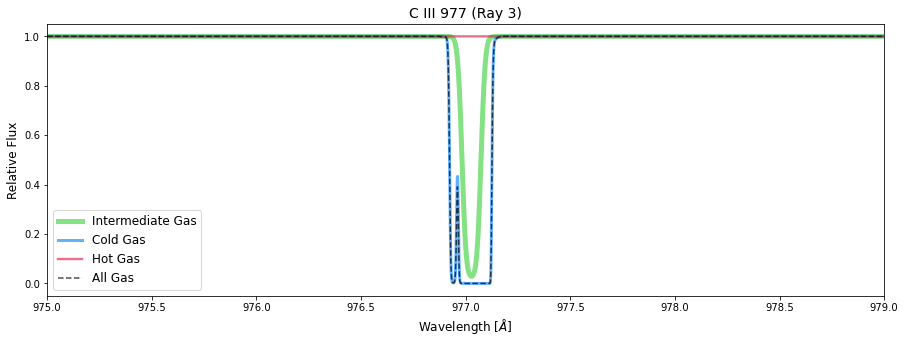

In [106]:
cut_spec(ray3, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, num='3')

yt : [INFO     ] 2022-07-12 22:41:01,395 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:01,397 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5613.63it/s]
yt : [INFO     ] 2022-07-12 22:41:01,473 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:01,499 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 14/14 [00:00<00:00, 3166.71it/s]
yt : [INFO     ] 2022-07-12 22:41:01,511 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:01,537 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 6/6 [00:00<00:00, 795.88it/s]
yt : [INFO     ] 2022-07-12 22:41:01,547 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:01,574 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 236/236 [00:00<00:00, 6271.26it/s]
yt : [INFO     ] 2022-07-12 22:41:01,614 Writing spectrum to ascii f

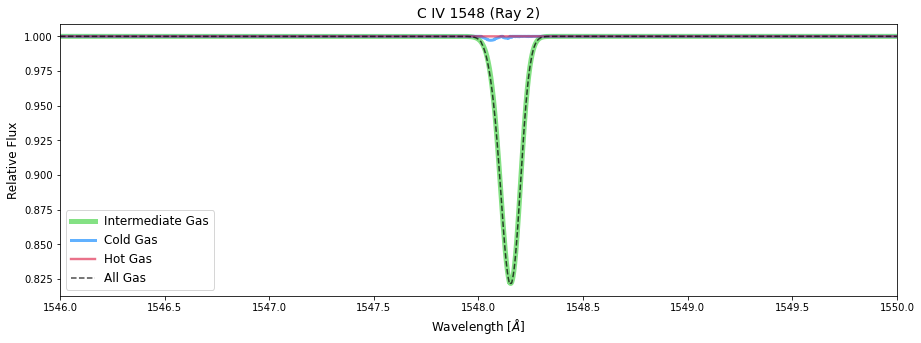

In [107]:
cut_spec(ray2, 1546, 1550, line='C IV 1548', num='2')

yt : [INFO     ] 2022-07-12 22:41:01,841 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:01,844 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5930.05it/s]
yt : [INFO     ] 2022-07-12 22:41:01,917 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:01,943 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 42/42 [00:00<00:00, 4036.59it/s]
yt : [INFO     ] 2022-07-12 22:41:01,961 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:01,987 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 3/3 [00:00<00:00, 853.02it/s]
yt : [INFO     ] 2022-07-12 22:41:01,993 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:02,019 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 211/211 [00:00<00:00, 6614.43it/s]
yt : [INFO     ] 2022-07-12 22:41:02,053 Writing spectrum to ascii f

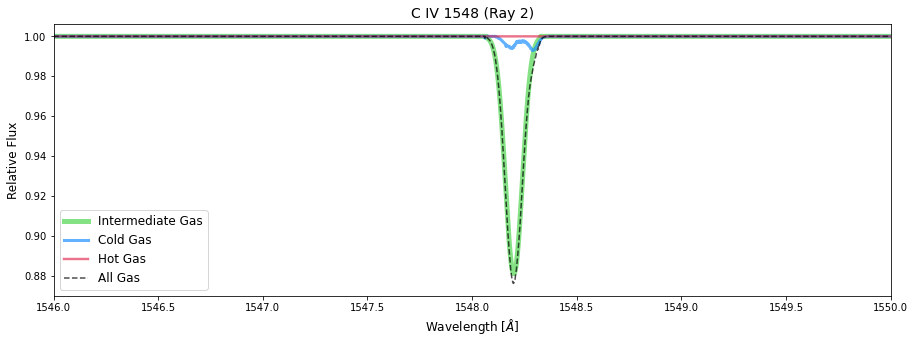

In [108]:
cut_spec(ray3, 1546, 1550, line='C IV 1548', num='2')

yt : [INFO     ] 2022-07-12 22:41:02,279 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:02,282 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 8464.12it/s]
yt : [INFO     ] 2022-07-12 22:41:02,399 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:02,427 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 14/14 [00:00<00:00, 717.69it/s]
yt : [INFO     ] 2022-07-12 22:41:02,486 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:02,514 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 6/6 [00:00<00:00, 1429.96it/s]
yt : [INFO     ] 2022-07-12 22:41:02,532 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:02,559 Creating spectrum
yt : [INFO     ] 2022-07-12 22:41:02,560 Not adding line O II 833: insufficient column density
yt : [INFO     ] 2022-07-12 22:41:02,560 Not adding line O II 833: insuffi

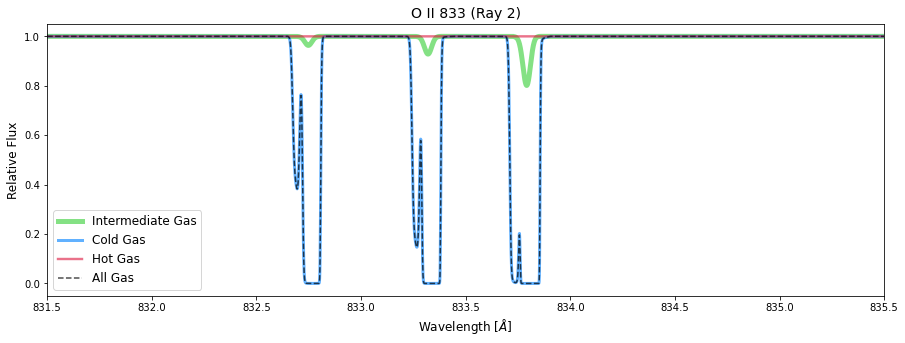

In [109]:
cut_spec(ray2, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True,num='2')

yt : [INFO     ] 2022-07-12 22:41:02,797 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:02,864 Creating spectrum
Adding line - O III* 835 [835.289000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9652.83it/s]
yt : [INFO     ] 2022-07-12 22:41:02,949 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:02,976 Creating spectrum
Adding line - O III* 835 [835.289000 A]: : 100%|██████████| 14/14 [00:00<00:00, 1034.88it/s]
yt : [INFO     ] 2022-07-12 22:41:03,012 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:03,038 Creating spectrum
Adding line - O III* 835 [835.289000 A]: : 100%|██████████| 6/6 [00:00<00:00, 1174.00it/s]
yt : [INFO     ] 2022-07-12 22:41:03,053 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:03,080 Creating spectrum
yt : [INFO     ] 2022-07-12 22:41:03,081 Not adding line O III* 835: insufficient column density
yt : [INFO     ] 2022-07-12 22:41:03,081 Not adding line O III* 8

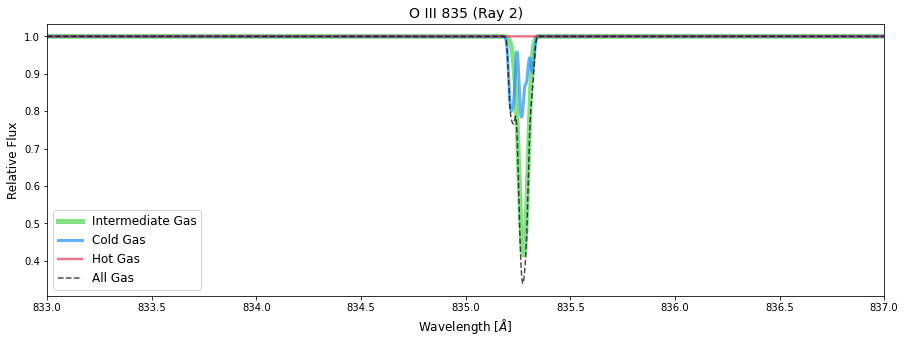

In [110]:
cut_spec(ray2, 833, 837, line='O III 835', num='2')

yt : [INFO     ] 2022-07-12 22:41:03,310 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:03,313 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12660.71it/s]
yt : [INFO     ] 2022-07-12 22:41:03,363 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:03,390 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 14/14 [00:00<00:00, 1151.87it/s]
yt : [INFO     ] 2022-07-12 22:41:03,410 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:03,436 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 6/6 [00:00<00:00, 5059.47it/s]
yt : [INFO     ] 2022-07-12 22:41:03,440 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:03,465 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 236/236 [00:00<00:00, 29258.84it/s]
yt : [INFO     ] 2022-07-12 22:41:03,476 Writing spectrum

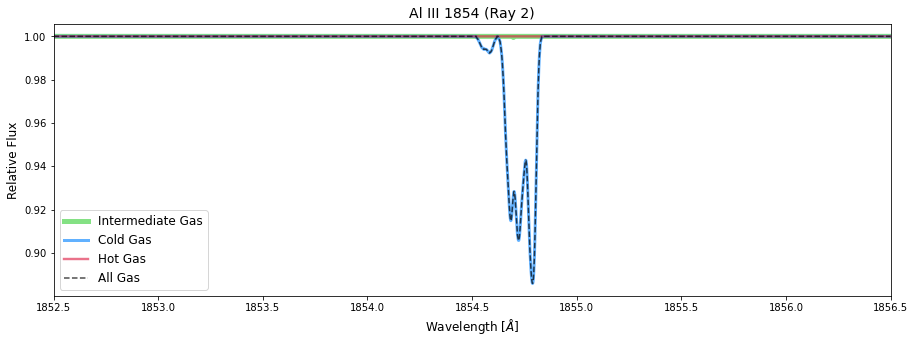

In [111]:
cut_spec(ray2, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True,num='2')

yt : [INFO     ] 2022-07-12 22:41:03,703 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:03,707 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9694.49it/s]
yt : [INFO     ] 2022-07-12 22:41:03,764 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:03,791 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 14/14 [00:00<00:00, 766.70it/s]
yt : [INFO     ] 2022-07-12 22:41:03,817 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:03,844 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 6/6 [00:00<00:00, 4002.84it/s]
yt : [INFO     ] 2022-07-12 22:41:03,848 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:03,874 Creating spectrum
yt : [INFO     ] 2022-07-12 22:41:03,875 Not adding line Al II 1671: insufficient column density
yt : [INFO     ] 2022-07-12 22:41:03,876 Writing spectrum to as

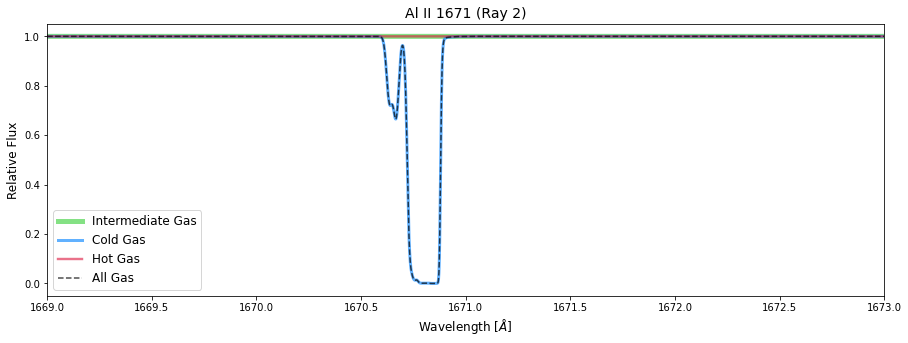

In [112]:
cut_spec(ray2, 1669, 1673, line='Al II 1671', num='2')

yt : [INFO     ] 2022-07-12 22:41:04,107 Setting instrument to Custom
yt : [INFO     ] 2022-07-12 22:41:04,111 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10824.67it/s]
yt : [INFO     ] 2022-07-12 22:41:04,166 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-12 22:41:04,193 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 14/14 [00:00<00:00, 1048.91it/s]
yt : [INFO     ] 2022-07-12 22:41:04,214 Writing spectrum to ascii file: spec_c.txt.
yt : [INFO     ] 2022-07-12 22:41:04,239 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 6/6 [00:00<00:00, 2145.06it/s]
yt : [INFO     ] 2022-07-12 22:41:04,245 Writing spectrum to ascii file: spec_i.txt.
yt : [INFO     ] 2022-07-12 22:41:04,271 Creating spectrum
yt : [INFO     ] 2022-07-12 22:41:04,272 Not adding line Fe III 1122: insufficient column density
yt : [INFO     ] 2022-07-12 22:41:04,272 Writing spectrum

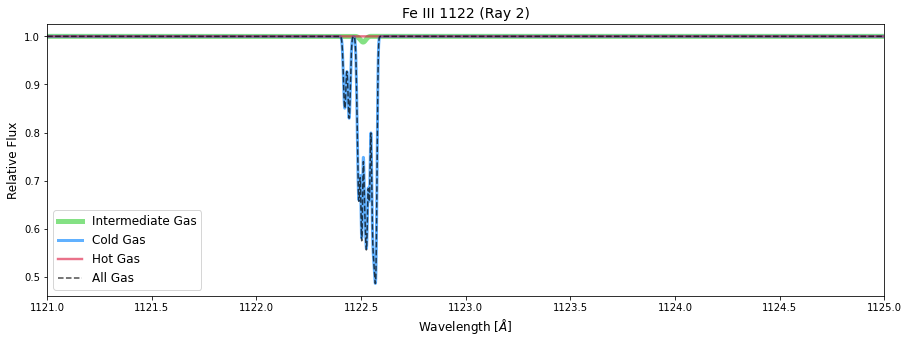

In [113]:
cut_spec(ray2, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    num='2')